In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
info_race = pd.read_csv("data/ischool_race.csv")
info_race["School"] = "Inforamtion Science"
info_race[info_race["Year"] == 2024]["Count"].sum()

np.int64(2116)

In [3]:
cmns_race = pd.read_csv("data/cmns_race.csv")
cmns_race["School"] = "Computer Science"
cmns_race

,Year,Race/Ethnicity (Old),Race/Ethnicity (Current),Count,School
0,2016,American Indian or Alaska Native,American Indian or Alaska Native,7,Computer Science
1,2016,Asian,Asian,1610,Computer Science
2,2016,Black or African American,Black or African American,589,Computer Science
3,2016,Hispanic/Latino,Hispanic/Latino,417,Computer Science
4,2016,Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,4,Computer Science
...,...,...,...,...,...
76,2024,Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,4,Computer Science
77,2024,Two or More Races,Two or More Races,330,Computer Science
78,2024,U.S. Nonresident,U.S. Nonresident,392,Computer Science
79,2024,Unknown,Unknown,487,Computer Science


In [4]:
bmgt_race = pd.read_csv("data/bmgt_race.csv")
bmgt_race["School"] = "Business"
bmgt_race

,Year,Race/Ethnicity (Old),Race/Ethnicity (Current),Count,School
0,2016,American Indian or Alaska Native,American Indian or Alaska Native,1,Business
1,2016,Asian,Asian,546,Business
2,2016,Black or African American,Black or African American,265,Business
3,2016,Hispanic/Latino,Hispanic/Latino,334,Business
4,2016,Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,3,Business
...,...,...,...,...,...
76,2024,Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,1,Business
77,2024,Two or More Races,Two or More Races,140,Business
78,2024,U.S. Nonresident,U.S. Nonresident,92,Business
79,2024,Unknown,Unknown,150,Business


In [5]:
engr_race = pd.read_csv("data/engr_race.csv")
engr_race["School"] = "Engineering"
engr_race

,Year,Race/Ethnicity (Old),Race/Ethnicity (Current),Count,School
0,2016,American Indian or Alaska Native,American Indian or Alaska Native,0,Engineering
1,2016,Asian,Asian,772,Engineering
2,2016,Black or African American,Black or African American,325,Engineering
3,2016,Hispanic/Latino,Hispanic/Latino,271,Engineering
4,2016,Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,4,Engineering
...,...,...,...,...,...
76,2024,NaN,Native Hawaiian or Other Pacific Islander,1,Engineering
77,2024,NaN,Two or More Races,233,Engineering
78,2024,NaN,U.S. Nonresident,135,Engineering
79,2024,NaN,Unknown,234,Engineering


In [6]:
bsos_race = pd.read_csv("data/bsos_race.csv")
bsos_race["School"] = "Behavioral and Social Sciences"
bsos_race

,Year,Race/Ethnicity (Old),Race/Ethnicity (Current),Count,School
0,2016,American Indian or Alaska Native,American Indian or Alaska Native,7,Behavioral and Social Sciences
1,2016,Asian,Asian,447,Behavioral and Social Sciences
2,2016,Black or African American,Black or African American,669,Behavioral and Social Sciences
3,2016,Hispanic/Latino,Hispanic/Latino,529,Behavioral and Social Sciences
4,2016,Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,1,Behavioral and Social Sciences
...,...,...,...,...,...
76,2024,Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,2,Behavioral and Social Sciences
77,2024,Two or More Races,Two or More Races,210,Behavioral and Social Sciences
78,2024,U.S. Nonresident,U.S. Nonresident,107,Behavioral and Social Sciences
79,2024,Unknown,Unknown,154,Behavioral and Social Sciences


In [7]:
jour_race = pd.read_csv("data/jour_race.csv")
jour_race["School"] = "Journalism"
jour_race

,Year,Race/Ethnicity (Old),Race/Ethnicity (Current),Count,School
0,2016,American Indian or Alaska Native,American Indian or Alaska Native,1,Journalism
1,2016,Asian,Asian,26,Journalism
2,2016,Black or African American,Black or African American,66,Journalism
3,2016,Hispanic/Latino,Hispanic/Latino,39,Journalism
4,2016,Two or More Races,Two or More Races,15,Journalism
...,...,...,...,...,...
67,2024,Hispanic/Latino,Hispanic/Latino,41,Journalism
68,2024,Two or More Races,Two or More Races,17,Journalism
69,2024,U.S. Nonresident,U.S. Nonresident,4,Journalism
70,2024,Unknown,Unknown,15,Journalism


In [8]:
computing_majors_racial_makeup = pd.concat([info_race,cmns_race,bmgt_race,jour_race,engr_race,bsos_race])
computing_majors_racial_makeup

,Year,Race/Ethnicity (Old),Race/Ethnicity (Current),Count,School
0,2016,American Indian or Alaska Native,American Indian or Alaska Native,0,Inforamtion Science
1,2016,Asian,Asian,21,Inforamtion Science
2,2016,Black or African American,Black or African American,31,Inforamtion Science
3,2016,Hispanic/Latino,Hispanic/Latino,9,Inforamtion Science
4,2016,Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,0,Inforamtion Science
...,...,...,...,...,...
76,2024,Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,2,Behavioral and Social Sciences
77,2024,Two or More Races,Two or More Races,210,Behavioral and Social Sciences
78,2024,U.S. Nonresident,U.S. Nonresident,107,Behavioral and Social Sciences
79,2024,Unknown,Unknown,154,Behavioral and Social Sciences


In [9]:
racial_makeup_count = computing_majors_racial_makeup.groupby(["Year","Race/Ethnicity (Current)"]).sum()["Count"]
racial_makeup_count

Year  Race/Ethnicity (Current)                 
2016  American Indian or Alaska Native               16
      Asian                                        3422
      Black or African American                    1945
      Hispanic/Latino                              1599
      Native Hawaiian or Other Pacific Islander      12
                                                   ... 
2024  Native Hawaiian or Other Pacific Islander       9
      Two or More Races                            1017
      U.S. Nonresident                              799
      Unknown                                      1115
      White                                        7727
Name: Count, Length: 81, dtype: int64

In [10]:
total_population_computing = racial_makeup_count.sum()
total_population_computing

np.int64(173167)

In [11]:
racial_makeup = (racial_makeup_count/total_population_computing)*100
racial_makeup

Year  Race/Ethnicity (Current)                 
2016  American Indian or Alaska Native             0.009240
      Asian                                        1.976127
      Black or African American                    1.123193
      Hispanic/Latino                              0.923386
      Native Hawaiian or Other Pacific Islander    0.006930
                                                     ...   
2024  Native Hawaiian or Other Pacific Islander    0.005197
      Two or More Races                            0.587294
      U.S. Nonresident                             0.461404
      Unknown                                      0.643887
      White                                        4.462167
Name: Count, Length: 81, dtype: float64

In [18]:
racial_makeup_count_by_school = computing_majors_racial_makeup[computing_majors_racial_makeup["Year"] == 2024].groupby(["School","Race/Ethnicity (Current)"]).sum()["Count"]
racial_makeup_count_by_school.to_csv("racial_makeup_count_by_school.csv")

In [23]:
total_population_computing_by_school = racial_makeup_count_by_school.groupby(["School"]).sum()
total_population_computing_by_school

School
Behavioral and Social Sciences    3803
Business                          3098
Computer Science                  7332
Engineering                       4013
Inforamtion Science               2116
Journalism                         397
Name: Count, dtype: int64

In [24]:
racial_makeup_by_school = (racial_makeup_count_by_school/total_population_computing_by_school)*100
racial_makeup_by_school

School                          Race/Ethnicity (Current)                 
Behavioral and Social Sciences  American Indian or Alaska Native              0.052590
                                Asian                                        12.174599
                                Black or African American                    12.831975
                                Hispanic/Latino                              14.067841
                                Native Hawaiian or Other Pacific Islander     0.052590
                                Two or More Races                             5.521956
                                U.S. Nonresident                              2.813568
                                Unknown                                       4.049435
                                White                                        48.435446
Business                        American Indian or Alaska Native              0.032279
                                Asian                   

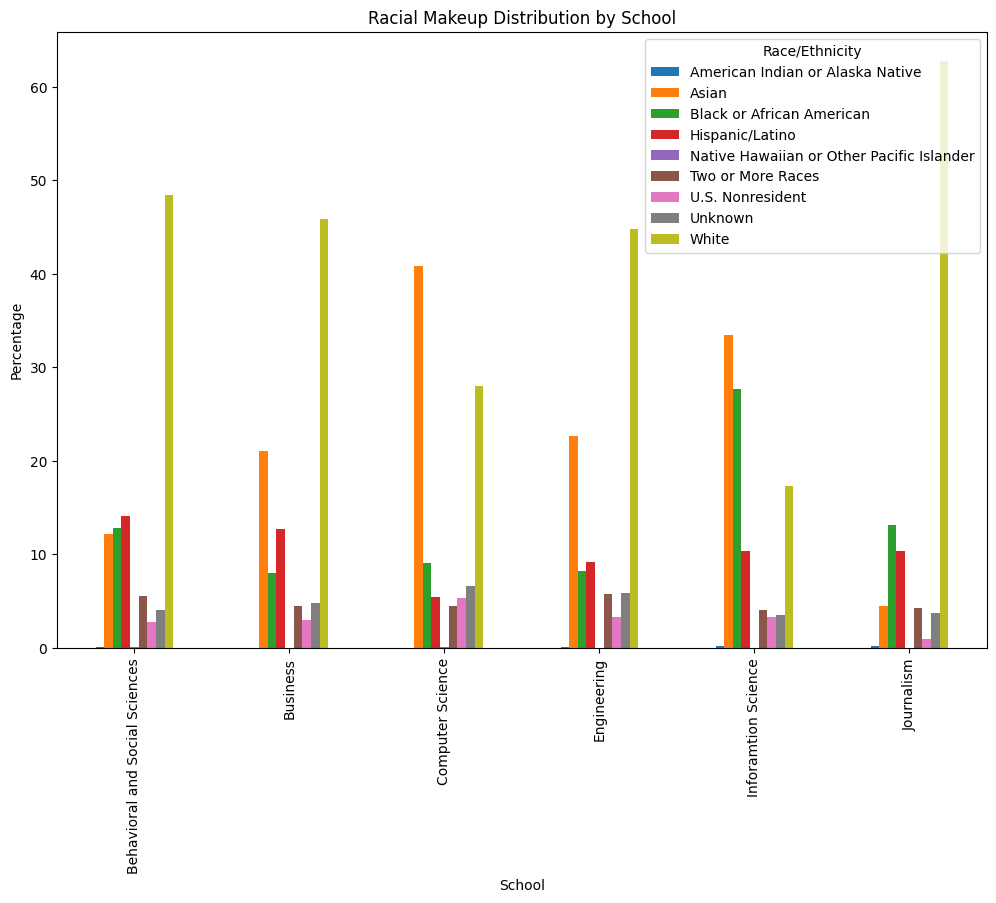

In [25]:
racial_makeup_by_school_df = racial_makeup_by_school.unstack(level=0)

racial_makeup_by_school_df = racial_makeup_by_school_df.T

ax = racial_makeup_by_school_df.plot(kind='bar', figsize=(12, 8))

plt.title('Racial Makeup Distribution by School')
plt.xlabel('School')
plt.ylabel('Percentage')
plt.legend(title='Race/Ethnicity')
plt.show()

In [16]:
def shannon_index(count,total):
    proportions = count / total
    shannon_score = -sum([p * math.log(p,2) for p in proportions if p > 0])
    return shannon_score

computing_majors_racial_makeup_2024 = computing_majors_racial_makeup[computing_majors_racial_makeup["Year"] == 2024]
counts_sum = computing_majors_racial_makeup_2024.groupby("School").sum()["Count"]
shannon_index_by_school = computing_majors_racial_makeup_2024.groupby("School").apply(
    lambda x: shannon_index(x["Count"], counts_sum[x.name])
)

shannon_index_by_school

/var/folders/r4/b7cllbyj13vbdjbq6fkcw0380000gt/T/ipykernel_3460/2693217071.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shannon_index_by_school = computing_majors_racial_makeup_2024.groupby("School").apply(


School
Behavioral and Social Sciences    2.229074
Business                          2.231054
Computer Science                  2.282032
Engineering                       2.272314
Inforamtion Science               2.365431
Journalism                        1.808633
dtype: float64

/var/folders/r4/b7cllbyj13vbdjbq6fkcw0380000gt/T/ipykernel_3460/586758269.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shannon_index_over_time = computing_majors_racial_makeup.groupby(["Year", "School"]).apply(


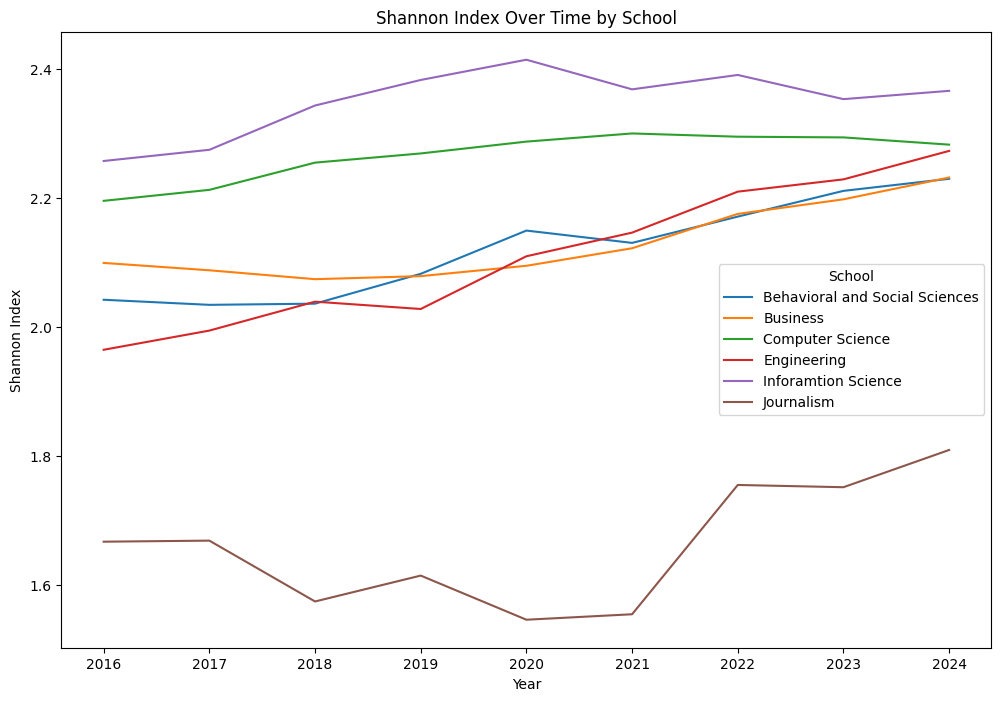

In [17]:
shannon_index_over_time = computing_majors_racial_makeup.groupby(["Year", "School"]).apply(
    lambda x: shannon_index(x["Count"], x["Count"].sum())
).unstack(level=0)

shannon_index_over_time = shannon_index_over_time.T


shannon_index_over_time.plot(kind="line",figsize=(12, 8))
plt.title('Shannon Index Over Time by School')
plt.xlabel('Year')
plt.ylabel('Shannon Index')
plt.legend(title='School')
plt.show()